In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


ref:
- https://www.kaggle.com/code/amandajudyandrade/mnist-sign-language-recognition
- https://www.kaggle.com/code/jarredpriester/sign-language-mnist-cnn-accuracy-100#3.-Processing-the-Images


load the .csv files 

In [2]:
train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

set up the train dataset

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
trian_df_original = train.copy()
# split into training,test and validation sets 
val_index = int(train.shape[0]*0.2)
train_df = trian_df_original.iloc[val_index:]
val_df = trian_df_original.iloc[:val_index]

In [5]:
Y = np.array(train_df['label'])
X = np.array(train_df.drop(columns ='label'))
X.shape,Y.shape

((21964, 784), (21964,))

In [6]:
y_train = pd.get_dummies(Y)
y_train.head(5)

,0,1,2,3,4,5,6,7,8,10,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
y_val = val_df['label']
x_val = val_df.drop(columns='label',axis=1)
y_val = pd.get_dummies(y_val)
print(y_val.shape,y_train.shape)

(5491, 24) (21964, 24)


In [8]:
x_val =pd.DataFrame(x_val).values.reshape(x_val.shape[0],28,28,1)
x_train = pd.DataFrame(X).values.reshape(X.shape[0],28,28,1)


In [9]:
import tensorflow as tf 
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale =1./255,
    rotation_range=10,
    zoom_range = 0.10,
    width_shift_range=0.1 , 
    height_shift_range = 0.1 ,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)
x_train_flow = generator.flow(x_train,y_train,batch_size=32)
x_val_flow = generator.flow(x_val,y_val,batch_size=32)


In [10]:
# from sklearn.model_selection import train_test_split 
# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

target number

In [11]:
# num_classes = np.unique(y_train.values)
# print(len(num_classes))


In [12]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Conv2D,Flatten,BatchNormalization,MaxPool2D,Dropout
import tensorflow as tf 


model = keras.Sequential()


model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.2))


model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))
model.add(Dropout(0.2))


# final output layer
model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
# model.add(Dense(units=4096,activation='relu'))
model.add(Dense(units=24,activation='softmax'))
model.summary()


2022-12-22 13:18:51.002242: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         1

In [13]:

model.compile(
    optimizer='adam',
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy'])


In [14]:
history = model.fit(
    x=  x_train_flow,
    validation_data=x_val_flow,
    batch_size=128,
    epochs=10)

Epoch 1/10


2022-12-22 13:18:51.720850: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


687/687 [==============================] - 94s 136ms/step - loss: 1.4514 - accuracy: 0.5361 - val_loss: 0.3456 - val_accuracy: 0.8905
Epoch 2/10
687/687 [==============================] - 91s 132ms/step - loss: 0.3355 - accuracy: 0.8850 - val_loss: 0.1526 - val_accuracy: 0.9537
Epoch 3/10
687/687 [==============================] - 90s 131ms/step - loss: 0.1744 - accuracy: 0.9410 - val_loss: 0.0715 - val_accuracy: 0.9778
Epoch 4/10
687/687 [==============================] - 91s 132ms/step - loss: 0.1162 - accuracy: 0.9608 - val_loss: 0.0446 - val_accuracy: 0.9863
Epoch 5/10
687/687 [==============================] - 91s 133ms/step - loss: 0.0993 - accuracy: 0.9660 - val_loss: 0.0261 - val_accuracy: 0.9931
Epoch 6/10
687/687 [==============================] - 90s 132ms/step - loss: 0.0845 - accuracy: 0.9725 - val_loss: 0.0291 - val_accuracy: 0.9914
Epoch 7/10
687/687 [==============================] - 91s 132ms/step - loss: 0.0636 - accuracy: 0.9780 - val_loss: 0.0189 - val_accuracy: 0.9

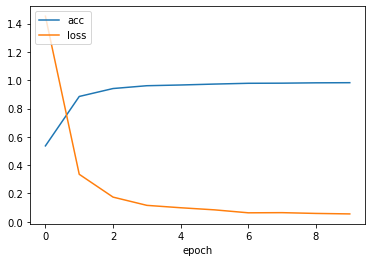

In [15]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
# plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','loss'], loc='upper left')
plt.show()


predict new data

In [16]:
y_test = np.array(test['label'])
x_test = np.array(test.drop(columns='label'))
y_test = pd.get_dummies(y_test)
x_test = pd.DataFrame(x_test).values.reshape(x_test.shape[0],28,28,1)

y_test = pd.get_dummies(y_test)

In [18]:
from sklearn.metrics import classification_report

# predictions
pred = model.predict(x_test)

y_pred = np.argmax(pred,axis=1)
y_test = np.argmax(y_test.values,axis=1)

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

# # Display the results
print(f'## {acc*100:.2f}% accuracy on the test set')

## 95.04% accuracy on the test set
